# LAB05

In [1]:
library(ggplot2)
library(cowplot)
library(coda)
library(rjags)

Linked to JAGS 4.3.2

Loaded modules: basemod,bugs



## Exercise 1
- Ladislaus Josephovich Bortkiewicz was a Russian economist and statistician. He noted that the Poisson distribution can be very useful in applied statistics when describing low-frequency events in a large population. In a famous example he showed that the number of deaths by horse kick among the Prussian army follows the Poisson distribution.

In [3]:
# sets of observations taken over a fixed large time interval in two different corps
y_death_soldiers = c(0:5)
n1_obs = c(109, 65, 22, 3, 1, 0)
n2_obs = c(144, 91, 32, 11, 2, 0)

# create table
df <- data.frame(y_death_soldiers, n1_obs, n2_obs)
t(df)

y_death_soldiers,0,1,2,3,4,5
n1_obs,109,65,22,3,1,0
n2_obs,144,91,32,11,2,0


In [4]:
# data sequence generation
x <- seq(0,1, length.out = 100)

data1 <- rep(df[,1], df[,2])
data2 <- rep(df[,1], df[,3])

#### (a) assuming a uniform prior, compute and plot the posterior distribution for λ, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval

In [5]:
# prior uniform distribution
alpha_u_0 <- 1
lambda_u_0 <- 0
prior_uniform <- dgamma(x, shape=alpha_u_0, scale=1/lambda_u_0)

# posterior uniform distribution - 1st obs
alpha_u <- sum(data1) + 1
lambda_u <- length(data1)
posterior_uniform_n1 <- dgamma(x, shape=alpha_u, scale=1/lambda_u)
posterior_uniform_n1 <- posterior_uniform_n1/sum(posterior_uniform_n1) #normalized

# posterior uniform distribution - 2nd obs
alpha_prime_u <- sum(data2) + alpha_u
lambda_prime_u <- length(data2) + lambda_u
posterior_uniform_n2 <- dgamma(x, shape=alpha_prime_u, scale=1/lambda_prime_u)
posterior_uniform_n2 <- posterior_uniform_n2/sum(posterior_uniform_n2) #normalized

## Statistical moments and median
# expected value
mean = alpha_prime_u/lambda_prime_u
# variance
var = alpha_prime_u/(lambda_prime_u**2)
# median
median = qgamma(0.5, shape = alpha_prime_u, scale = 1/lambda_prime_u)

## Intervals - 95% credibility
intervals <- qgamma(c(0.025, 0.975), shape = alpha_prime_u, scale = 1/lambda_prime_u)

Warning message:
"Removed 41 rows containing missing values (geom_path)."

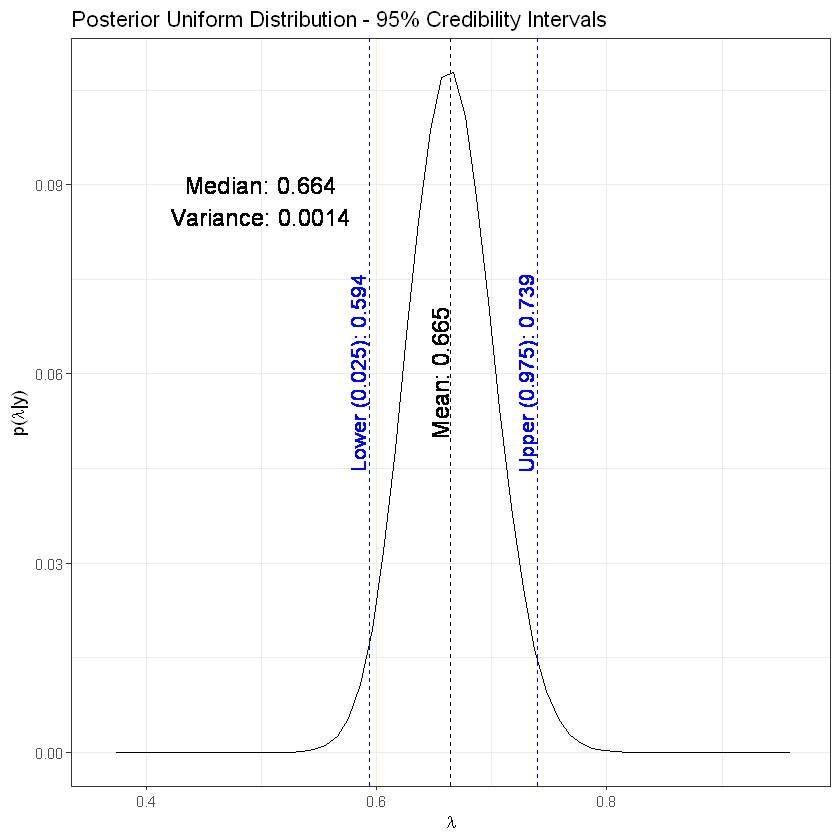

In [6]:
# plot
df1 <- data.frame(x, posterior_uniform_n2)

ggplot( data= df1, aes(x=x, y=posterior_uniform_n2)) +
    geom_line() +
    geom_vline(xintercept = intervals[1], linetype = "dashed", colour = "blue") +
    geom_vline(xintercept = intervals[2], linetype = "dashed", colour = "blue") +
    geom_vline(xintercept = median, linetype = "dashed", colour = "black") +
    
    geom_text(x = mean-0.01, y = 0.06, angle = 90, label = paste("Mean:", round(mean, 3)), size = 5, color = "black") + 
    geom_text(x = 0.5, y = 0.09, label = paste("Median:", round(median, 3)), size = 5, color = "black") + 
    geom_text(x = 0.5, y = 0.085, label = paste("Variance:", round(var, 4)), size = 5, color = "black") + 
    
    geom_text(x = intervals[1]-0.01, y = 0.06, angle = 90, label = paste("Lower (0.025):", round(intervals[1], 3)), size = 4.5, color = "blue") + 
    geom_text(x = intervals[2]-0.01, y = 0.06, angle = 90, label = paste("Upper (0.975):", round(intervals[2], 3)), size = 4.5, color = "blue") + 
    
    labs(title = "Posterior Uniform Distribution - 95% Credibility Intervals", x = expression(lambda), y = expression(paste("p(", lambda, "|y)")), color = "Distributions") +
    theme(legend.position = c(0.7, 0.2)) +
    xlim(mean-0.3, mean+0.3) +
    theme_bw()

#### (b) assuming now a Jeffreys’ prior, $g(\lambda) \propto 1/\sqrt{\lambda} $, with $\lambda > 0$ compute and plot the posterior distribution for $\lambda$, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval.

In [7]:
# Jeffrey'sprior distribution
alpha_j_0 <- 1/2
lambda_j_0 <- 0
prior_j <- dgamma(x, shape = alpha_j_0, scale = 1/lambda_j_0) 
prior_j <- prior_j/sum(prior_j) #normalized

# Jeffrey's posterior distribution - 1st obs
alpha_j_1 <- sum(data1) + alpha_j_0
lambda_j_1 <- length(data1) + lambda_j_0
posterior_j_n1 <- dgamma(x, shape=alpha_j_1, scale=1/lambda_j_1)
posterior_j_n1 <- posterior_j_n1/sum(posterior_j_n1) #normalized

# Jeffrey's posterior distribution - 2nd obs
alpha_prime_j <- sum(data2) + alpha_j_1
lambda_prime_j <- length(data2) + lambda_j_1
posterior_j_n2 <- dgamma(x, shape=alpha_prime_j, scale=1/lambda_prime_j)
posterior_j_n2 <- posterior_j_n2/sum(posterior_j_n2) #normalized

## Statistical moments and median
# expected value
mean = alpha_prime_j/lambda_prime_j
# variance
var = alpha_prime_j/(lambda_prime_j**2)
# median
median = qgamma(0.5, shape = alpha_prime_j, scale = 1/lambda_prime_j)

## Intervals - 95% credibility
intervals <- qgamma(c(0.025, 0.975), shape = alpha_prime_j, scale = 1/lambda_prime_j)

Warning message:
"Removed 40 rows containing missing values (geom_path)."

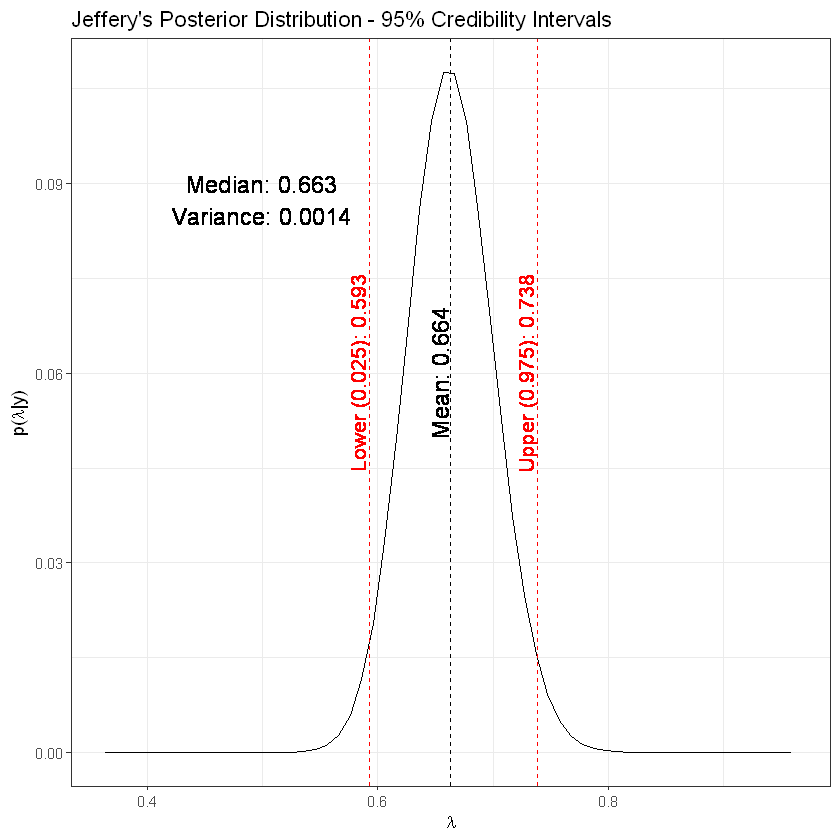

In [8]:
# plot
df2 <- data.frame(x, posterior_j_n2)

ggplot( data= df2, aes(x=x, y=posterior_j_n2)) +
    geom_line() +
    geom_vline(xintercept = intervals[1], linetype = "dashed", colour = "red") +
    geom_vline(xintercept = intervals[2], linetype = "dashed", colour = "red") +
    geom_vline(xintercept = median, linetype = "dashed", colour = "black") +
    
    geom_text(x = mean-0.01, y = 0.06, angle = 90, label = paste("Mean:", round(mean, 3)), size = 5, color = "black") + 
    geom_text(x = 0.5, y = 0.09, label = paste("Median:", round(median, 3)), size = 5, color = "black") + 
    geom_text(x = 0.5, y = 0.085, label = paste("Variance:", round(var, 4)), size = 5, color = "black") + 
    
    geom_text(x = intervals[1]-0.01, y = 0.06, angle = 90, label = paste("Lower (0.025):", round(intervals[1], 3)), size = 4.5, color = "red") + 
    geom_text(x = intervals[2]-0.01, y = 0.06, angle = 90, label = paste("Upper (0.975):", round(intervals[2], 3)), size = 4.5, color = "red") + 
    
    labs(title = "Jeffery's Posterior Distribution - 95% Credibility Intervals", x = expression(lambda), y = expression(paste("p(", lambda, "|y)")), color = "Distributions") +
    theme(legend.position = c(0.7, 0.2)) +
    xlim(mean-0.3, mean+0.3) +
    theme_bw()

## Exercise 2

- solve Exercise 1 with a Markov Chain Monte Carlo. Build your own MCMC, using the functions introduced during lectures, or using a MCM library like JAGS.

In [9]:
MCMC.func <- function(theta.init, sigma, n_samples, shape0, shape1) { 
        # empty vector for accepted samples
        values <- c() 
        # initialize the chain at some value
        theta_init <- dgamma(theta.init, shape = shape0, scale = 1/(shape1))
        
        for (i in 1:n_samples){
            
            # draw a random sample fron a distribution
            sample <- rnorm(1, mean=0, sd = sigma)
            # new candidate sample
            theta_new <- dgamma(sample, shape = shape0, scale = 1/shape1)
            
            # dedice whether to accept or not the new candidate sample
            if (theta_new > theta_init){
                theta_init <- theta_new
                x <- sample
            }
            else {
                p <- theta_new/theta_init
                t <- runif(1, min = 0, max = 1)
                
                if (t <= p){
                    theta_init <- theta_new
                    x <- sample
                }
                else {
                    theta_init <- theta_init
                    x <- theta.init
                }
            }
        
        values <- c(values,x)
        theta.init <- x
        }
    
        return(values)
    }

Warning message:
"Removed 13 rows containing non-finite values (stat_bin)."Warning message:
"Removed 13 rows containing non-finite values (stat_density)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."

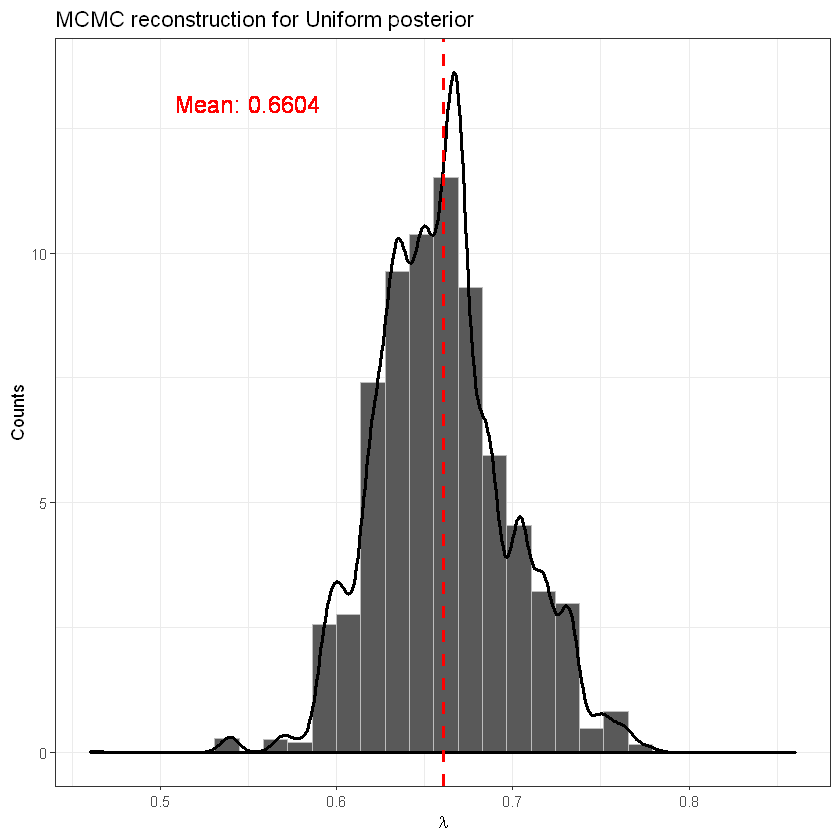

In [12]:
# Assuming an Uniform Prior Distribution

mcmc_uniform <- MCMC.func(0.3, 0.5, 10000, alpha_prime_u, lambda_prime_u)
df_mcmc <- data.frame(mcmc_uniform)

# plot histogram
ggplot(df_mcmc, aes(x = mcmc_uniform)) +
    geom_histogram(aes(y = stat(density)), color="gray", bins=30)+ #binwidth = 0.005) +
    geom_density(lwd = 1, linetype = 1) +

    geom_vline(aes(xintercept=mean(mcmc_uniform)), color="red", linetype="dashed", size=1) +
    geom_text(x=0.55, y=13, label=paste("Mean:", round(mean(mcmc_uniform), 4)), color="red", size=5) +
    
    labs(x =expression(lambda), y = "Counts", color = "") +
    ggtitle("MCMC reconstruction for Uniform posterior") +
    theme_bw() + 
    xlim(mean(mcmc_uniform)-0.2, mean(mcmc_uniform)+0.2)

Warning message:
"Removed 12 rows containing non-finite values (stat_bin)."Warning message:
"Removed 12 rows containing non-finite values (stat_density)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."

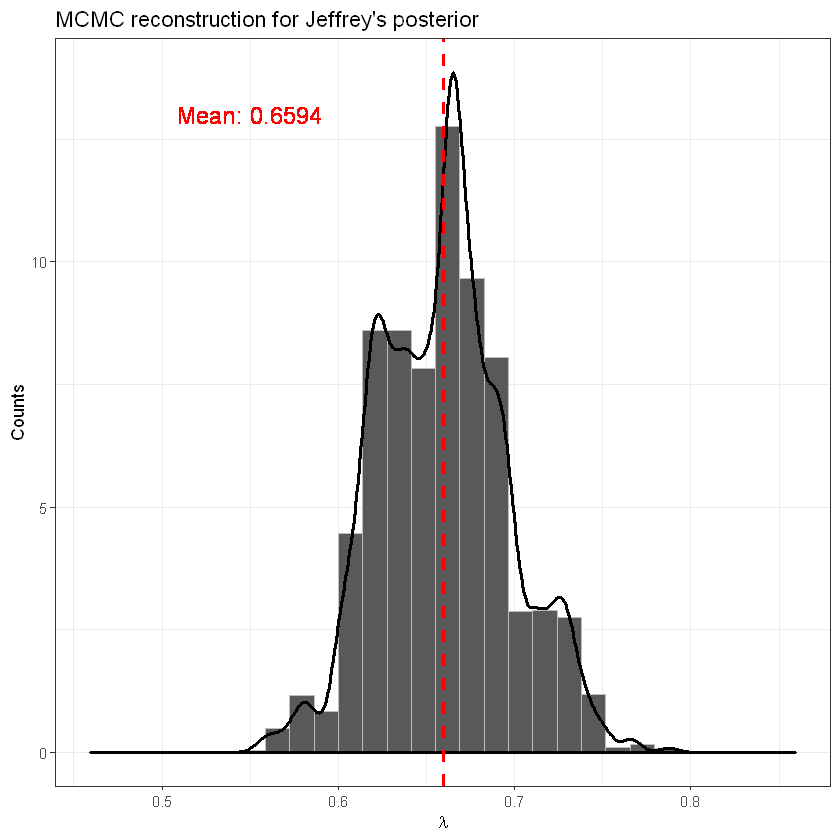

In [15]:
# Assuming a Jeffrey's Prior Distribution 

mcmc_jeffrey <- MCMC.func(0.3, 0.5, 10000, alpha_prime_j, lambda_prime_j)
df_mcmc <- data.frame(mcmc_jeffrey)

# plot histogram
ggplot(df_mcmc, aes(x = mcmc_jeffrey)) +
    geom_histogram(aes(y = stat(density)), color="gray", bins=30)+ #binwidth = 0.005) +
    geom_density(lwd = 1, linetype = 1) +

    geom_vline(aes(xintercept=mean(mcmc_jeffrey)), color="red", linetype="dashed", size=1) +
    geom_text(x=0.55, y=13, label=paste("Mean:", round(mean(mcmc_jeffrey), 4)), color="red", size=5) +
    
    labs(x =expression(lambda), y = "Counts", color = "") +
    ggtitle("MCMC reconstruction for Jeffrey's posterior") +
    theme_bw() + 
    xlim(mean(mcmc_jeffrey)-0.2, mean(mcmc_jeffrey)+0.2)

## Exercise 3
- A study on water quality of streams, a high level of bacter X was defined as a level greater than 100 per 100 ml of stream water. n = 116 samples were taken from streams having a high environmental impact on pandas. Out of these, y = 11 had a high bacter X level.
- indicating with p the probability that a sample of water taken from the stream has a high bacter X level

#### (a) find the frequentist estimator for p

In [16]:
y <- 11     # high bacter X level
n <- 116    # samples

# calculate frequentist estimator
p <- y/n
cat("Probability that a sample of water taken from the stream has a high bacter X level: ", p)

Probability that a sample of water taken from the stream has a high bacter X level:  0.09482759

#### (b) using a Beta(1, 10) prior for p, calculate and posterior distribution P(p | y)

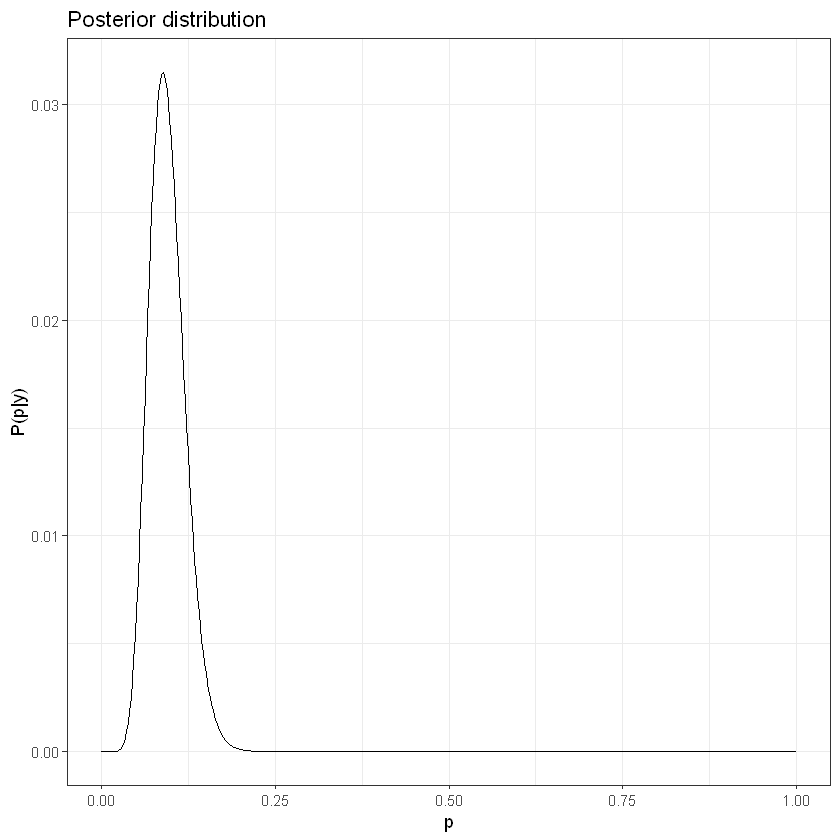

In [17]:
q <- seq(0, 1, length.out=501)

# Posterior Beta(1,10) distribution
alpha_post <- 1 + y
beta_post <- 10 + (n - y)
p.post <- dbeta(q, shape1=alpha_post, shape2=beta_post)
p.post.normalized <- p.post/sum(p.post)

# store in dataframe
df <- data.frame(q, p.post.normalized)

# plot the posterior
ggplot(data = df, aes(x = q, y = p.post.normalized)) +
    geom_line() +
    labs(x = "p", y = "P(p|y)", color = "Distributions") +
    theme(legend.position = "bottom", legend.box = "horizontal") +
    ggtitle("Posterior distribution") +
    theme_bw()

#### (c) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval.

In [18]:
bayesian_estimator <- alpha_post/(alpha_post+beta_post)

mean <- bayesian_estimator
var <- (alpha_post*beta_post)/((alpha_post+beta_post)^2 *(alpha_post+beta_post+1))

credibility <- qbeta(c(0.025, 0.975), alpha_post, beta_post)

df_4 <- data.frame(mean,var,lower_credibility=credibility[1],upper_credibility=credibility[2])
t(df_4)

mean,0.0944881890
var,0.0006684388
lower_credibility,0.0501852163
upper_credibility,0.1508379213


#### (d) test the hypotesis $H_{o} : p = 0.1 \; versus \; H_1 : p 6= 0.1$ at 5% level of significance with both the frequentist and bayesian approach
- a new measurement, performed one month later on n = 165 water samples, gives y = 9 high bacter X level


In [19]:
x <- seq(1, n, length = n)
significance <- 0.05

Warning message:
"Removed 91 rows containing missing values (position_stack)."Warning message:
"Removed 91 rows containing missing values (position_stack)."Warning message:
"Removed 91 rows containing missing values (position_stack)."Warning message:
"Removed 1 rows containing missing values (geom_col)."Warning message:
"Removed 1 rows containing missing values (geom_col)."Warning message:
"Removed 1 rows containing missing values (geom_col)."

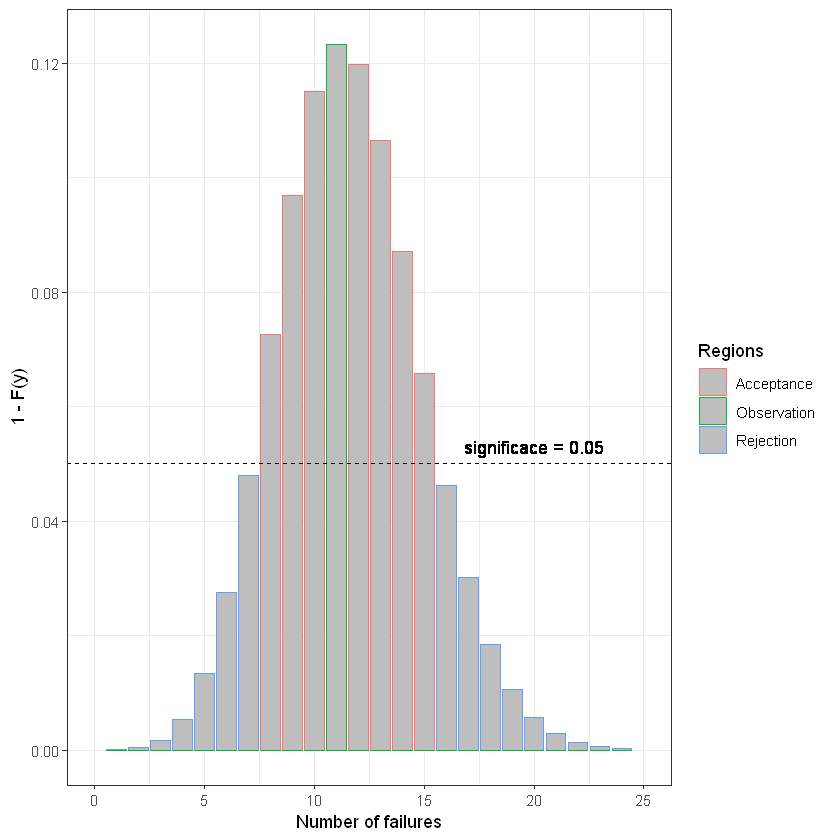

In [20]:
## Frequentist Approach

# set up null hypothesis
prob <- 0.1

# null distribution - binomial distribution
null_distrib <- dbinom(1:n, size = n, prob = prob)

# select acceptance region
acceptance_region <- null_distrib
acceptance_region[acceptance_region < significance] = 0

# select rejection region
rejection_region <- null_distrib
rejection_region[rejection_region > significance] = 0

# select observation
obs <- rep(0, n)
obs[obs = y] = null_distrib[y]

# store in dataframe
df_freq <- data.frame(acceptance_region, rejection_region, obs, x)

# plot
ggplot(data = df_freq, aes(x = x)) +
    geom_col(aes(y = acceptance_region, color = "Acceptance"), fill = "gray") +
    geom_col(aes(y = rejection_region, color = "Rejection"), fill = "gray") +
    geom_col(aes(y = obs, color = "Observation"), fill = "gray") +
    
    geom_hline(yintercept = 0.05, linetype = "dashed") +
    geom_text(x = 20, y = 0.05+0.003, label = "significace = 0.05") +
    labs(x = "Number of failures", y = "1 - F(y)", color = "Regions") +
    theme_bw() +
    xlim(0, 25)

Warning message:
"Removed 375 rows containing missing values (geom_path)."

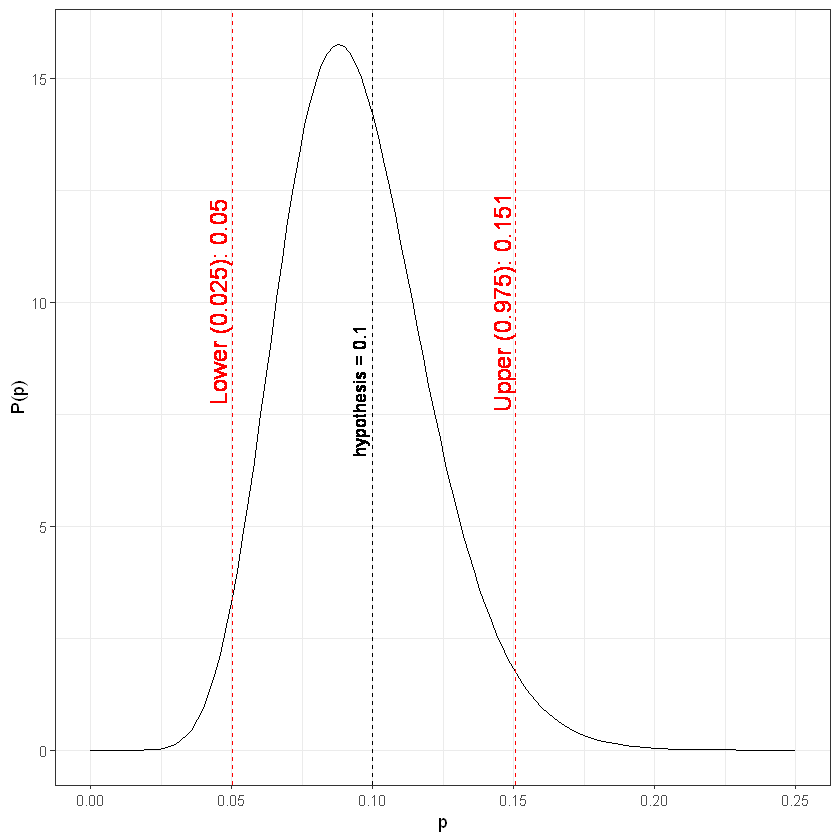

In [21]:
## Bayesian Approach

# uniform prior
p.prior <- dbeta(q, 1, 10)

# compute posterior distribution
p.post <- dbeta(q, 1+y, 10+n-y)

# compute lower and upper interval
credib_int <- qbeta(c(0.025, 0.975), 1+y, 10+n-y)

# store in dataframe
df_bayesian <- data.frame(p.post, q)

# plot
ggplot(data = df_bayesian, aes(x = q, y = p.post))+
    geom_line() +
    geom_vline(xintercept = credib_int[1], linetype = "dashed", color = "red") +
    geom_vline(xintercept = credib_int[2], linetype = "dashed", color = "red") +
    geom_vline(xintercept = 0.1, linetype = "dashed") +
    geom_text(x = 0.095, y = 8, angle = 90, label = "hypothesis = 0.1") +
    geom_text(x = credib_int[1]-0.005, y = 10, angle = 90, label = paste("Lower (0.025):", round(credib_int[1], 3)), size = 5, color = "red") + 
    geom_text(x = credib_int[2]-0.005, y = 10, angle = 90, label = paste("Upper (0.975):", round(credib_int[2], 3)), size = 5, color = "red") +     
    labs(x = "p", y = "P(p)") +
    theme_bw() +
    xlim(0, 0.25)

#### (e) find the frequentist estimator for p

In [22]:
y_new <- 9     #samples with a high bacter X level
n_new <- 165    #samples

# calculate frequentist estimator
p_new <- y_new/n_new
cat("Frequentist estimator of the new measurement: ", p_new)

Frequentist estimator of the new measurement:  0.05454545

#### (f) find a bayesian estimator for p, assuming both a Beta(1, 10) prior for p, and assuming the posterior probability of the older measurement as the prior for the new one.

In [26]:
# assuming Beta(1, 10)

alpha_new_1 <- 1 + y_new
beta_new_1 <- 10 + n_new - y_new
# computation of bayesian estimator
bayesian_estimator_1 <- alpha_new_1/(alpha_new_1 + beta_new_1)

# assuming previous posterior probability as prior 
alpha_new_2 <- alpha_post + y_new
beta_new_2 <- beta_post + n_new - y_new
# computation of bayesian estimator
bayesian_estimator_2 <- alpha_new_2/(alpha_new_2 + beta_new_2)

#Print the information
cat("The bayesian estimator for p using Beta(1,10) is:", bayesian_estimator_1, '\n')
cat("The bayesian estimator for p using the old posterior as the current prior is:", bayesian_estimator_2)

The bayesian estimator for p using Beta(1,10) is: 0.05681818 
The bayesian estimator for p using the old posterior as the current prior is: 0.07191781

#### (g) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval

In [27]:
# calculate mean, variance and 95% credibility interval for p using Beta(1,10)
mean_1 <- bayesian_estimator1
var_1 <- (alpha_new1*beta_new1)/((alpha_new1+beta_new1)^2 * (alpha_new1+beta_new1+1))
credibility_1 <- qbeta(c(0.025, 0.975), alpha_new1, beta_new1)

# calculate mean, variance and 95% credibility interval for p using the old posterior probability as the prior one
mean_2 <- bayesian_estimator2
var_2 <- (alpha_new2*beta_new2)/((alpha_new2+beta_new2)^2 * (alpha_new2+beta_new2+1))
credibility_2 <- qbeta(c(0.025, 0.975), alpha_new2, beta_new2)

# store in dataframe
beta_1_10 <- c(mean_1, var_1, credibility_1[1], credibility_1[2])
old_as_new <- c(mean_2, var_2, credibility_2[1], credibility_2[2])
values <- c("Mean", "Variance", "Lower Credibility", "Upper credibility")

df_results_g <- data.frame(values, beta_1_10, old_as_new)
df_results_g

values,beta_1_10,old_as_new
Mean,0.0568181818,0.0719178082
Variance,0.0003027677,0.0002278008
Lower Credibility,0.0277391827,0.0452235636
Upper credibility,0.0953801239,0.1041519494


#### (h) test the hypotesis $H_{o} : p = 0.1 \; versus \; H_1 : p \neq 0.1$ at 5% level of significance with both the frequentist and bayesian approach

In [31]:
## Frequentist Approach

### BETA(1,10)

# set up null hypothesis
prob <- 0.1

# null distribution - binomial distribution
null_distrib_beta <- dbinom(1:n_new, size = n_new, prob = prob)

# select acceptance region
acceptance_region_1 <- null_distrib_beta
acceptance_region_1[acceptance_region_1 < significance] = 0

# select rejection region
rejection_region_1 <- null_distrib_beta
rejection_region_1[rejection_region_1 > significance] = 0

# select observation
obs_1 <- rep(0, n_new)
obs_1[obs_1 = y_new] = null_distrib_beta[y_new]


### Before posterior as new prior

# null distribution - binomial distribution
null_distrib_old_new <- dbinom(1:(n + n_new), size = (n + n_new), prob = prob)

# select acceptance region
acceptance_region_2 <- null_distrib_old_new
acceptance_region_2[acceptance_region_2 < significance] = 0

# select rejection region
rejection_region_2 <- null_distrib_old_new
rejection_region_2[rejection_region_2 > significance] = 0

# select observation
obs_2 <- rep(0, (n + n_new))
obs_2[obs_2 = y+y_new] = null_distrib_old_new[y+y_new]

In [32]:
## Bayesian Approach

### BETA(1,10)

# compute posterior distribution
p.post1 <- dbeta(q, 1+y_new, 10+n_new-y_new)

# compute lower and upper interval
credib_int1 <- qbeta(c(0.025, 0.975), 1+y_new, 10+n_new-y_new)


### Before posterior as new prior

# compute posterior distribution
p.post2 <- dbeta(q, alpha_post+y_new, beta_post+n_new-y_new)

# compute lower and upper interval
credib_int2 <- qbeta(c(0.025, 0.975), alpha_post+y_new, beta_post+n_new-y_new)

Warning message:
"Removed 125 rows containing missing values (position_stack)."Warning message:
"Removed 125 rows containing missing values (position_stack)."Warning message:
"Removed 125 rows containing missing values (position_stack)."Warning message:
"Removed 1 rows containing missing values (geom_col)."Warning message:
"Removed 1 rows containing missing values (geom_col)."Warning message:
"Removed 1 rows containing missing values (geom_col)."Warning message:
"Removed 221 rows containing missing values (position_stack)."Warning message:
"Removed 221 rows containing missing values (position_stack)."Warning message:
"Removed 221 rows containing missing values (position_stack)."Warning message:
"Removed 1 rows containing missing values (geom_col)."Warning message:
"Removed 1 rows containing missing values (geom_col)."Warning message:
"Removed 1 rows containing missing values (geom_col)."Warning message:
"Removed 435 rows containing missing values (geom_path)."Warning message:
"Removed 

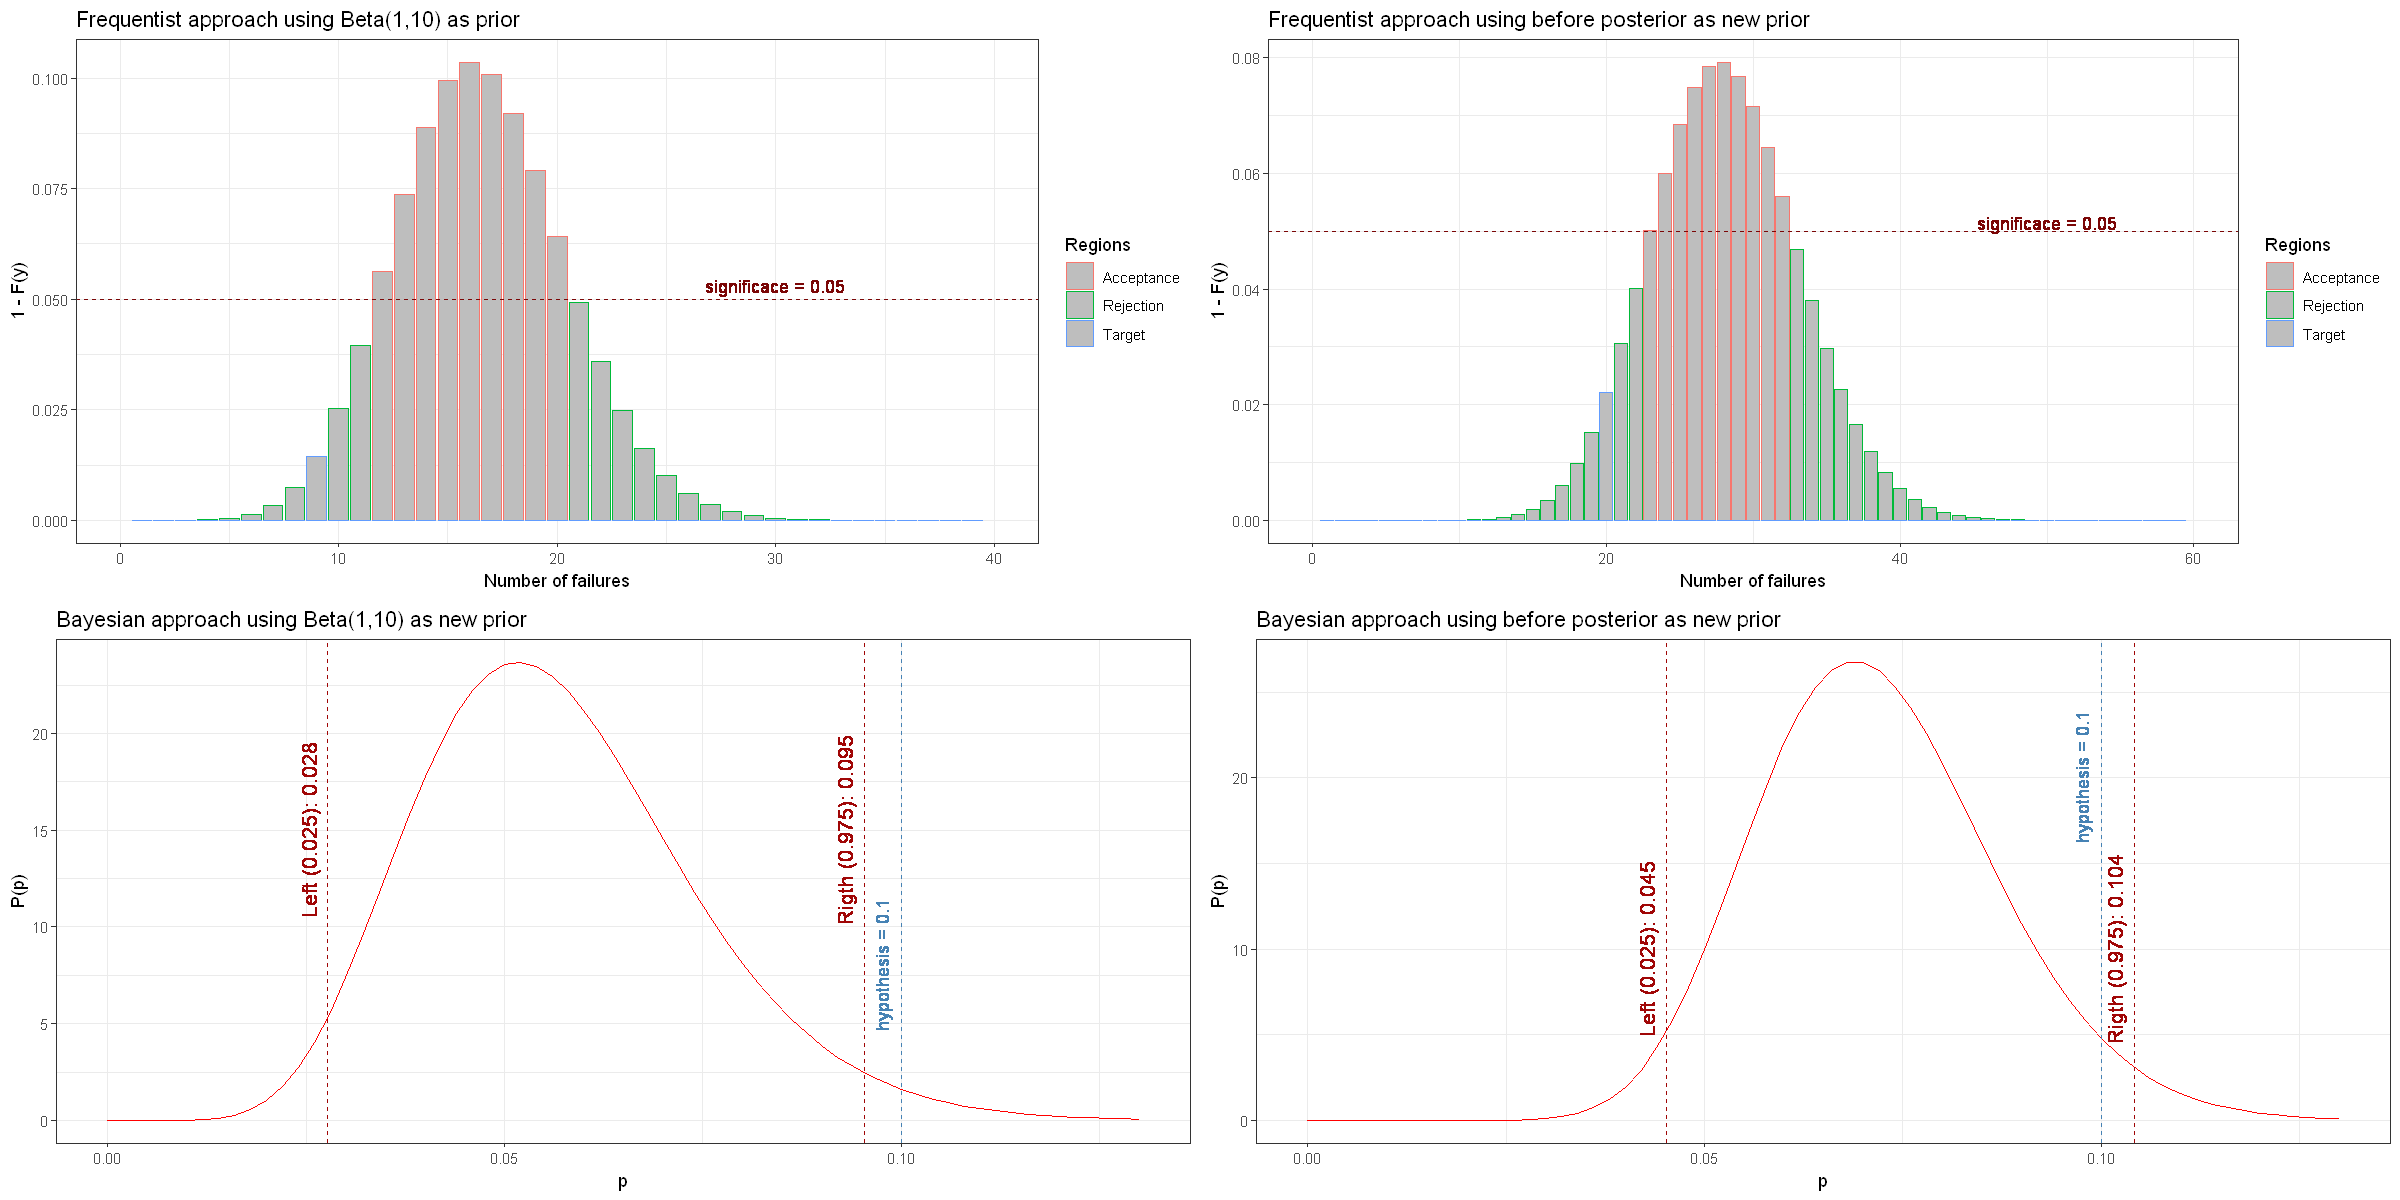

In [38]:
x <- seq(1, n, length = n)

# store in dataframe
df_sum1 <- data.frame(acceptance_region_1, rejection_region_1, obs_1)
df_sum2 <- data.frame(acceptance_region_2, rejection_region_2, obs_2)
df_sum3 <- data.frame(p.post1, p.post2)


# plots

frequentist_beta_plot <- ggplot(data = df_sum1, aes(x = c(1:n_new))) +
    geom_col(aes(y = acceptance_region_1, color = "Acceptance"), fill = "gray") +
    geom_col(aes(y = rejection_region_1, color = "Rejection"), fill = "gray") +
    geom_col(aes(y = obs_1, color = "Target"), fill = "gray") +
    geom_hline(yintercept = 0.05, linetype = "dashed", color = "#7b0606") +
    
    geom_text(x = 30, y = 0.05+0.003, label = "significace = 0.05", color = "#7b0606") +
    labs(x = "Number of failures", y = "1 - F(y)", color = "Regions") +
    ggtitle("Frequentist approach using Beta(1,10) as prior") +
    theme_bw() +
    xlim(0, 40)

frequentist_oldasnew_plot <- ggplot(data = df_sum2, aes(x = c(1:(n + n_new)))) +
    geom_col(aes(y = acceptance_region_2, color = "Acceptance"), fill = "gray") +
    geom_col(aes(y = rejection_region_2, color = "Rejection"), fill = "gray") +
    geom_col(aes(y = obs_2, color = "Target"), fill = "gray") +
    geom_hline(yintercept = 0.05, linetype = "dashed", color = "#7b0606") + 
    
    geom_text(x = 50, y = 0.05+0.0015, label = "significace = 0.05", color = "#7b0606") +
    labs(x = "Number of failures", y = "1 - F(y)", color = "Regions") +
    ggtitle("Frequentist approach using before posterior as new prior") +
    theme_bw() +
    xlim(0, 60)

bayesian_beta_plot <- ggplot(data = df_sum3, aes(x = q, y = p.post1))+
    geom_line(color="red") +
    geom_vline(xintercept = credib_int1[1], linetype = "dashed", color = "#a00606") +
    geom_vline(xintercept = credib_int1[2], linetype = "dashed", color = "#a00606") +
    geom_vline(xintercept = 0.1, linetype = "dashed", color = "steelblue") +
    
    geom_text(x = 0.1-0.0025, y = 8, angle = 90, label = "hypothesis = 0.1", color = "steelblue") +
    geom_text(x = credib_int1[1]-0.0025, y = 15, angle = 90, label = paste("Left (0.025):", round(credib_int1[1], 3)), size = 4.5, color = "#a00606") + 
    geom_text(x = credib_int1[2]-0.0025, y = 15, angle = 90, label = paste("Rigth (0.975):", round(credib_int1[2], 3)), size = 4.5, color = "#a00606") +     
    labs(x = "p", y = "P(p)") +
    theme_bw() +
    ggtitle("Bayesian approach using Beta(1,10) as new prior") +
    xlim(0, 0.13)

bayesian_oldasnew_plot <- ggplot(data = df_sum3, aes(x = q, y = p.post2))+
    geom_line(color="red") +
    geom_vline(xintercept = credib_int2[1], linetype = "dashed", color = "#a00606") +
    geom_vline(xintercept = credib_int2[2], linetype = "dashed", color = "#a00606") +
    geom_vline(xintercept = 0.1, linetype = "dashed", color = "steelblue") +
    
    geom_text(x = 0.1-0.0025, y = 20, angle = 90, label = "hypothesis = 0.1", color = "steelblue") +
    geom_text(x = credib_int2[1]-0.0025, y = 10, angle = 90, label = paste("Left (0.025):", round(credib_int2[1], 3)), size = 4.5, color = "#a00606") + 
    geom_text(x = credib_int2[2]-0.0025, y = 10, angle = 90, label = paste("Rigth (0.975):", round(credib_int2[2], 3)), size = 4.5, color = "#a00606") +     
    labs(x = "p", y = "P(p)") +
    theme_bw() +
    ggtitle("Bayesian approach using before posterior as new prior") +
    xlim(0, 0.13)

# grid
grid_plot <- plot_grid(frequentist_beta_plot, frequentist_oldasnew_plot, bayesian_beta_plot, bayesian_oldasnew_plot, ncol = 2, nrow = 2)
grid_plot

## Exercise 4
- analyze the data of Exercise 3 and solve points (b) and (c) using a MCMC with JAGS

In [2]:
##
# https://bookdown.org/kevin_davisross/bayesian-reasoning-and-methods/introduction-to-jags.html
##

# set parameters
n <- 116    
y <- 11

# create the model
model_string <- "model{
    # Likelihood
    y ~ dbinom(theta,n)

    # Prior
    theta ~dbeta(alpha, beta)
    alpha <- 1
    beta <- 10
}"

# compile in JAGS
datalist = list(y = y, n = n)
model <- jags.model(file = textConnection(model_string), data = datalist)

# simulate values
update(model, n.iter = 1000)
Nrep = 10000
posterior <- coda.samples(model, variable.names = c("theta"), n.iter = Nrep)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1
   Unobserved stochastic nodes: 1
   Total graph size: 5

Initializing model




Iterations = 2001:12000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     0.0947568      0.0261981      0.0002620      0.0003658 

2. Quantiles for each variable:

   2.5%     25%     50%     75%   97.5% 
0.05032 0.07596 0.09247 0.11056 0.15305 


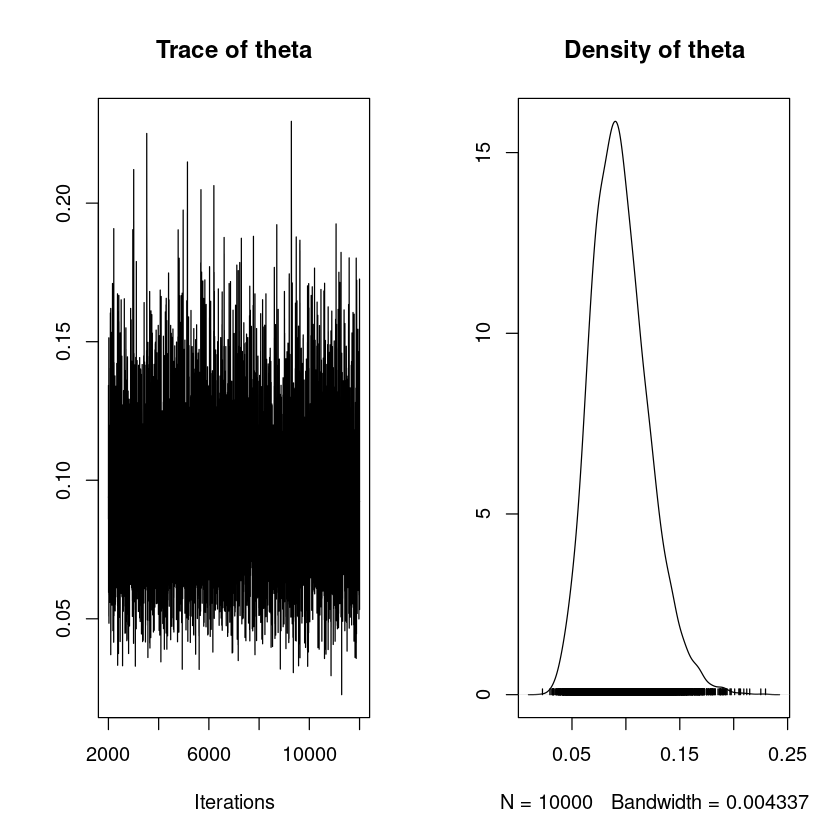

In [3]:
# show results
summary(posterior)

# plot results
plot(posterior)

In [5]:
plotPost(posterior)

ERROR: Error in plotPost(posterior): could not find function "plotPost"
